# TP Integrador N° 1 
#### Grupo 10

Integrantes:
- Rodrigo Gramajo
- Facundo Peloso
- Guido Perez 
- Roberto Biancardi
- Nicolás Baraneck

In [2]:
#Importacion de librerias/módulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Establezco la dirección del archivo
file_location='properatti.csv'

#Leo el data set
datos_crudos=pd.read_csv(file_location)

#Visualizo las primeras filas
display(datos_crudos.head(3))



,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [4]:
#Visualizco la dimensión del Dataset
print('Tamaño del dataset')
print('Filas:',datos_crudos.shape[0])
print('Columnas:',datos_crudos.shape[1])

Tamaño del dataset
Filas: 121220
Columnas: 26


In [5]:
#Columnas del dataset

listado_de_columnas=datos_crudos.columns

for i in listado_de_columnas : 
    print(i)

Unnamed: 0
operation
property_type
place_name
place_with_parent_names
country_name
state_name
geonames_id
lat-lon
lat
lon
price
currency
price_aprox_local_currency
price_aprox_usd
surface_total_in_m2
surface_covered_in_m2
price_usd_per_m2
price_per_m2
floor
rooms
expenses
properati_url
description
title
image_thumbnail


### Analisis cualitativa de las columnas / cuales son de interes

(aca describir porque sacamos las que no sirven)

In [17]:
#Damos de baja las columnas operation

datos= datos_crudos.drop(['Unnamed: 0','operation','country_name','place_name','country_name','state_name','geonames_id','lat','lon'], axis=1)

datos.head(3)

,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,PH,|Argentina|Capital Federal|Mataderos|,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,apartment,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,apartment,|Argentina|Capital Federal|Mataderos|,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [24]:
#Damos de bajo el currency
datos.currency.value_counts()

valor_de_cambio=datos.price_aprox_local_currency/datos.price_aprox_usd

serie_cambio=valor_de_cambio.value_counts()

mascara_cambio=serie_cambio==17.6445

print(serie_cambio.shape[0])

print(mascara_cambio.shape[0])


#

7238
7238


In [19]:
#Creo una serie donde guardo el porcentaje de nulos en cada columna
porcentaje_nulos_columnas=100*datos.isna().sum()/datos.shape[0]

#Visualizo la serie
display(porcentaje_nulos_columnas)

property_type                  0.000000
place_with_parent_names        0.000000
lat-lon                       42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000
image_thumbnail                2.567233
dtype: float64

(array([11.,  6.,  1.,  1.,  4.,  0.,  1.,  0.,  0.,  2.]),
 array([ 0.        ,  9.34837486, 18.69674971, 28.04512457, 37.39349942,
        46.74187428, 56.09024913, 65.43862399, 74.78699885, 84.1353737 ,
        93.48374856]),
 <BarContainer object of 10 artists>)

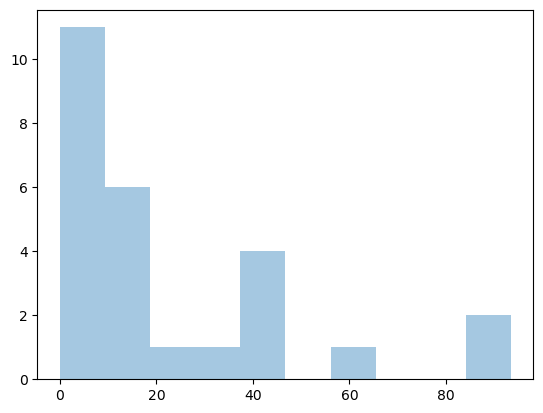

In [10]:
#Visualizamos porcentajes de nulos por columna en un histo

#creo una figura
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.hist(porcentaje_nulos_columnas, label='Porcentaje de Nulos por Columna', alpha = 0.4)

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_3524\2074386717.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ind)
C:\Users\fpeloso\AppData\Local\Temp\ipykernel_3524\2074386717.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ind, rotation = 90, ha="right")


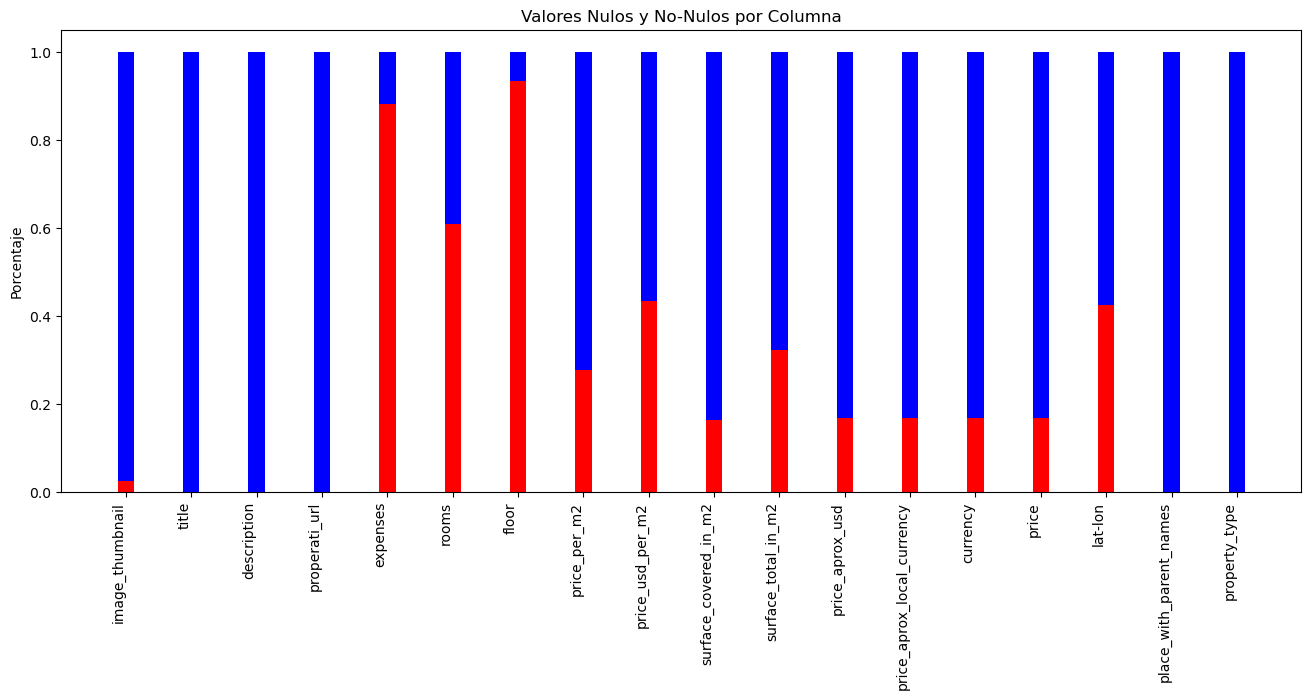

property_type                 0.000000
place_with_parent_names       0.000000
lat-lon                       0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail               0.025672
dtype: float64

property_type                 1.000000
place_with_parent_names       1.000000
lat-lon                       0.574740
price                         0.831628
currency                      0.831620
price_aprox_local_currency    0.831628
price_aprox_usd               0.831628
surface_total_in_m2           0.675565
surface_covered_in_m2         0.835778
price_usd_per_m2              0.566053
price_per_m2                  0.723131
floor                         0.065163
rooms                         0.390942
expenses                      0.117654
properati_url                 1.000000
description                   0.999984
title                         1.000000
image_thumbnail               0.974328
dtype: float64

1.0    18
dtype: int64

In [52]:
#with sns.axes_style('white'):
 #   g = sns.catplot(x = porcentaje_nulos_columnas.index, data=porcentaje_nulos_columnas.values, aspect=2, kind="count", color='steelblue')
  #  g.set_xticklabels(step=5)

ind=datos.columns
ind_label=np.arange(0,datos.shape[1]-1)

valores_nulos=datos.isnull().sum()/datos.shape[0]

valores_no_nulos=datos.notnull().sum()/datos.shape[0]

width = 0.25

fig = plt.figure(figsize=(16,6)); ax = plt.axes()
#fig2= plt.figure(figsize=(16,6)); ax2 = plt.axes()

ax.bar(ind, valores_nulos, width, color='r') # barra roja. 
ax.bar(ind, valores_no_nulos, width, color='b',bottom=valores_nulos)
#ax2.bar(ind, valores_no_nulos, width, color='b')#, bottom=valores_no_nulos) # barra azul 

ax.set_ylabel('Porcentaje'); ax.set_title('Valores Nulos y No-Nulos por Columna')
#ax.set_xticks(ind); 
ax.set_xticklabels(ind)
ax.tick_params(axis='both', which='minor', labelsize='small')

ax.set_xticklabels(ind, rotation = 90, ha="right")
#ax2.set_xticklabels(ind,labelsize=8)
#ax.legend(labels=['Men', 'Women'])

#plt.gca().invert_xaxis()
plt.show()

display(valores_nulos)

display(valores_no_nulos)

suma_ambos=valores_nulos+valores_no_nulos

suma_ambos.value_counts()


# se podría hacer uno grafico donde los labels esten en el eje vertical y los porcentajes en el horizontal???'

### Visualizar la calidad de los datos de cada columna

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_3524\497593519.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ind_label)


array([     0,      1,      2, ..., 121216, 121217, 121218])

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_3524\497593519.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','20', '40', '60', '80', '100'])


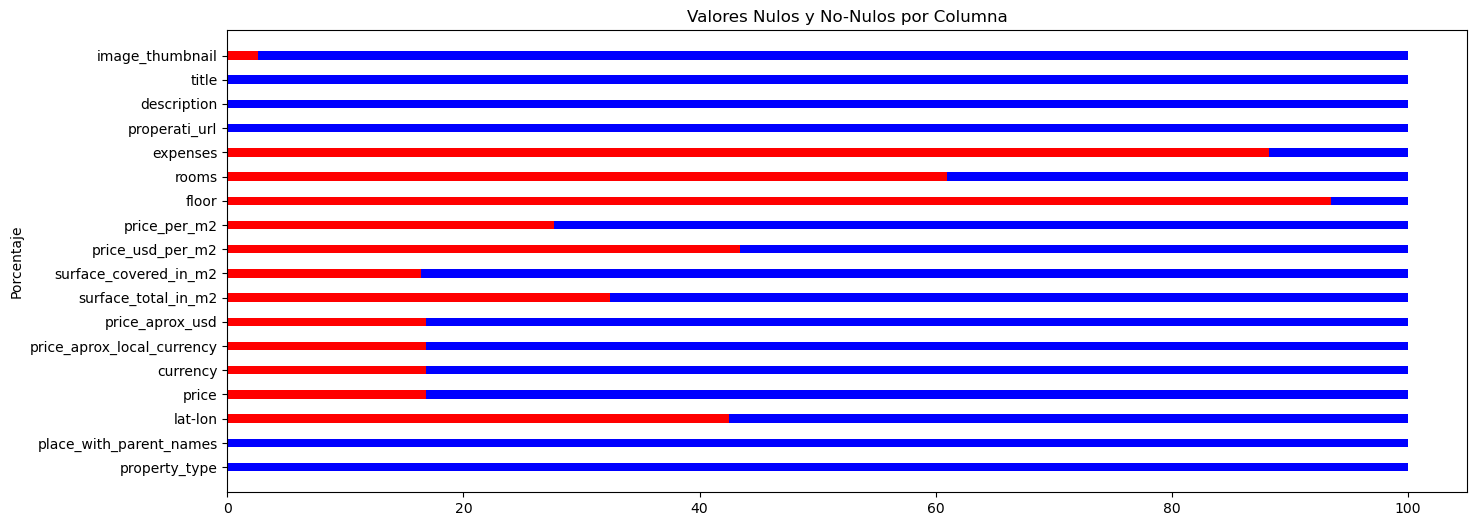

In [69]:
ind=datos.columns
ind_label=np.arange(0,datos.shape[0]-1)

valores_nulos=datos.isnull().sum()/datos.shape[0]

valores_no_nulos=datos.notnull().sum()/datos.shape[0]

width = 0.35

fig = plt.figure(figsize=(16,6),edgecolor='gray'); ax = plt.axes()
#fig2= plt.figure(figsize=(16,6)); ax2 = plt.axes()

ax.barh(ind, valores_nulos, width, color='r') # barra roja. 
ax.barh(ind, valores_no_nulos, width, color='b',left=valores_nulos)#,right=valores_nulos)
#ax2.bar(ind, valores_no_nulos, width, color='b')#, bottom=valores_no_nulos) # barra azul 

ax.set_ylabel('Porcentaje'); ax.set_title('Relación Nulos y No-Nulos por Columna')
#ax.set_xticks(ind); 

#aca estaba como antes (ind)
ax.set_xticklabels(ind_label)

display(ind_label)

ax.tick_params(axis='both', which='minor', labelsize='small')

#ax.set_xticklabels(ind, rotation = 90, ha="right")
#ax2.set_xticklabels(ind,labelsize=8)
#ax.legend(labels=['Men', 'Women'])

ax.set_xticklabels(['0','20', '40', '60', '80', '100'])

#plt.gca().invert_xaxis()
plt.show()

#display(valores_nulos)

#display(valores_no_nulos)

#suma_ambos=valores_nulos+valores_no_nulos

#suma_ambos.value_counts()


In [ ]:
#estaria para dropear pric, curency y el precio en moneda local

#usar datos de comentarios para validar, que la información sea consistente 

#validar 

en lugar de lon-lat , dejamos las otraas dos




In [76]:
df=pd.DataFrame([valores_nulos,valores_no_nulos])
df



SyntaxError: invalid syntax (1586771396.py, line 4)